# Haberman's Survival Dataset

The study contains the survival statistics of patients who underwent operations for breast cancer treatment at University of Chicago's Billings Hospital during the years  1958 and 1970.

Three attributes are provided for each patient: 
<br><b>age</b>
<br><b>yearOfOperation</b>
<br><b>axillaryNodesDetected</b>

Note - Axillary nodes are the lymph nodes located under the armpit area of body, they're responsible for filtration of lymph for the upper body

The fourth attribute <b>survivalStatus</b> will be our label to classify if the patient survived after the operation.<br>
-If survivalStatus is 1, then the patient survived for 5 or more years after the operation.<br>
-If survivalStatus is 2, then the patient died within 5 years of operation.<br>

<b>Goal</b> - To analyse the dataset for a way to classify the patients who survived and the ones who didn't.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

attributes = ['age', 'yearOfOperation', 'axillaryNodesDetected', 'survivalStatus']
hb = pd.read_csv("haberman.csv",names=attributes)

In [4]:
hb.shape

(306, 4)

In [5]:
hb["survivalStatus"].value_counts()

1    225
2     81
Name: survivalStatus, dtype: int64

Dataset contains details for <b>306 patients</b> out of which <b>225 patients successfully survived</b> for 5 or more years after their operation. Unfortunately, <b>81 patients</b> didn't survive more than 5 years after their operation. Since data for both labels is not equal, this is an unbalanced dataset.

## Pair Plots

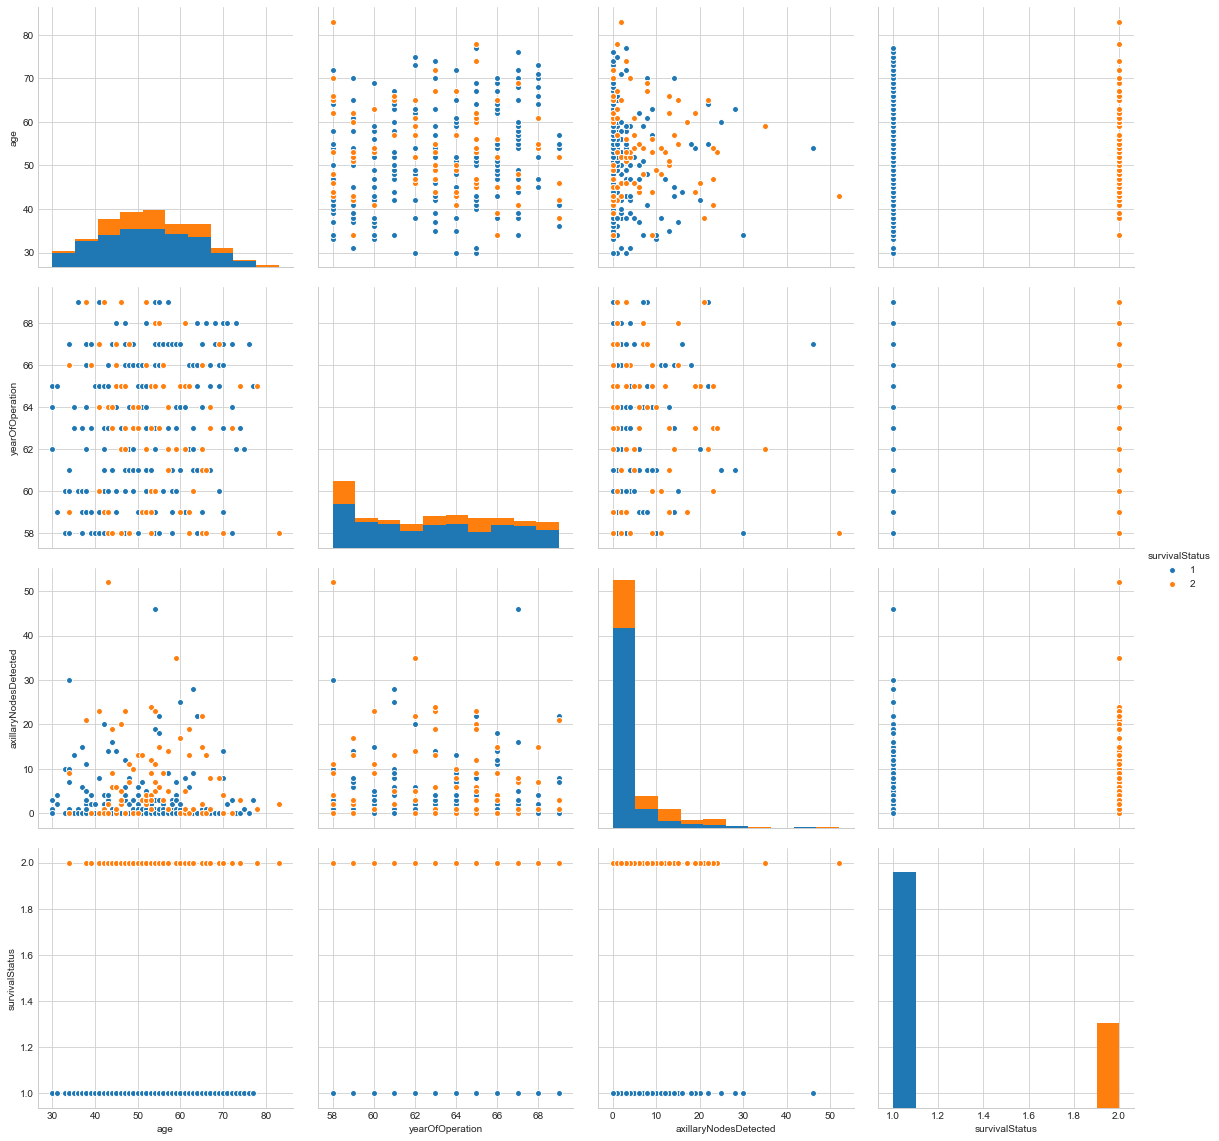

In [6]:
plt.close()
sns.set_style("whitegrid");
sns.pairplot(hb, hue="survivalStatus", size=4);
plt.show()

## I'm unable to figure out why the survivalStatus itself is showing up in the pair plots, please help me here.

### Obervations

1. A lot of survivors had axillaryNodesDetected below 3 or 4<br>
2. There doesn't seem to be any other pattern emerging in the pair plots. There is a lot of overlap between the two classes <br>

### PDF for all three attributes

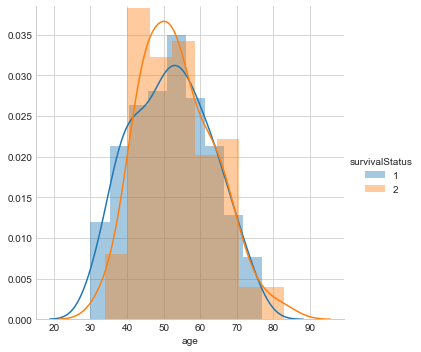

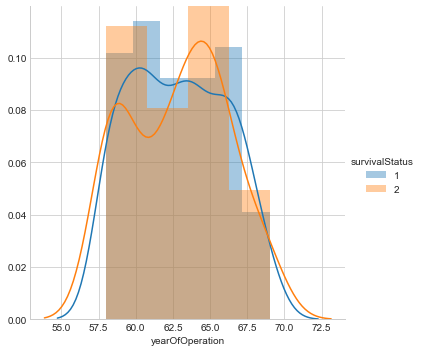

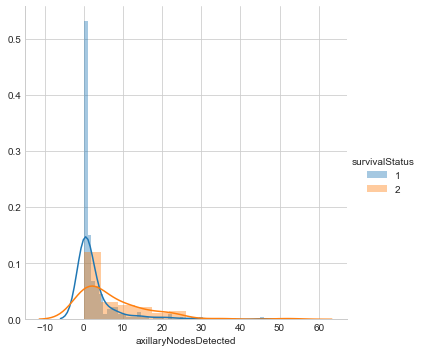

In [7]:
for i in range(3):
    sns.FacetGrid(hb, hue="survivalStatus", size=5) \
       .map(sns.distplot, attributes[i]) \
       .add_legend();
    
plt.show();

### Observations

1. These are the Probability Density Functions for all the attributes. Both classes are overlapping each other heavily in all the attributes. No conclusion can be derived.

In [8]:
#We now seperate the two classes and perform Univariate analysis for each of them

hb_survived = hb.loc[hb["survivalStatus"] == 1]
hb_lost = hb.loc[hb["survivalStatus"] == 2]

==============For age==============


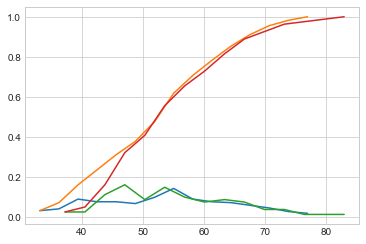

===========For yearOfOperation===========


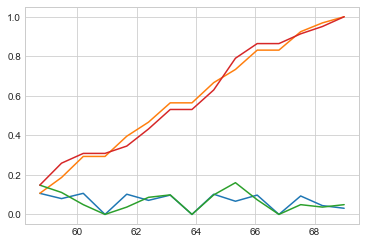

===========For axillaryNodesDetected===========


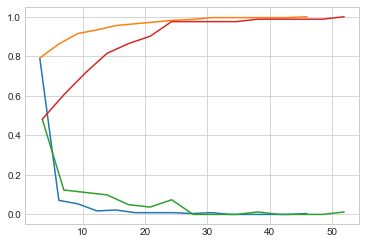

In [9]:
def plot_CDF_PDF(x):
    counts, bin_edges = np.histogram(x, bins=15, 
                                 density = True)

    pdf = counts/(sum(counts))
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:], cdf)
    
print("==============For age==============")

plot_CDF_PDF(hb_survived['age'])
plot_CDF_PDF(hb_lost['age']) 
plt.show()


print("===========For yearOfOperation===========")

plot_CDF_PDF(hb_survived['yearOfOperation'])
plot_CDF_PDF(hb_lost['yearOfOperation']) 
plt.show()
    
    
print("===========For axillaryNodesDetected===========")

plot_CDF_PDF(hb_survived['axillaryNodesDetected'])
plot_CDF_PDF(hb_lost['axillaryNodesDetected'])
plt.show()

### Observations

1. PDFs and CDFs are revealing no pattern here. 

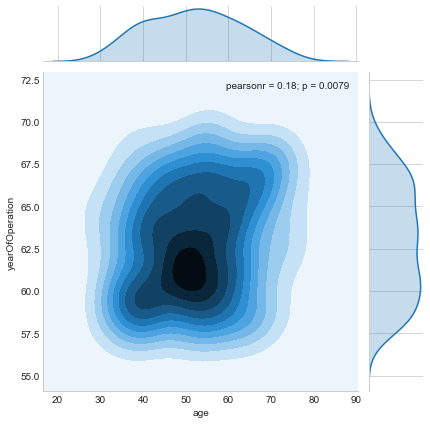

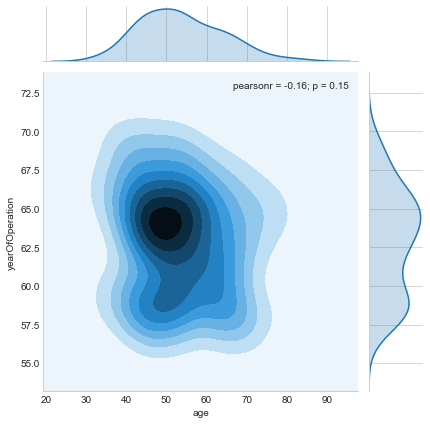

In [10]:
#Trying the contour plot for any pattern
sns.jointplot(x="age", y="yearOfOperation", data=hb_survived, kind="kde");
sns.jointplot(x="age", y="yearOfOperation", data=hb_lost, kind="kde");
plt.show();

### Observations

1. No pattern recognisable in the contour map.

### Voilin plots for all three attributes

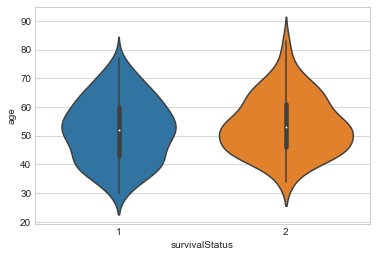

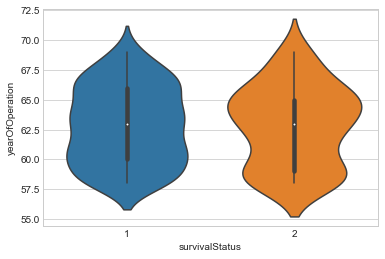

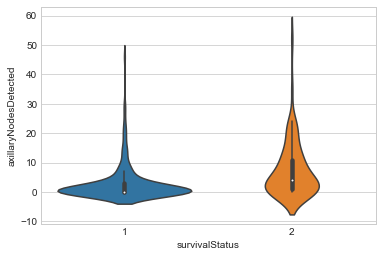

In [11]:
for i in range(3):
    sns.violinplot(x="survivalStatus", y=attributes[i], data=hb, size=8)
    plt.show()

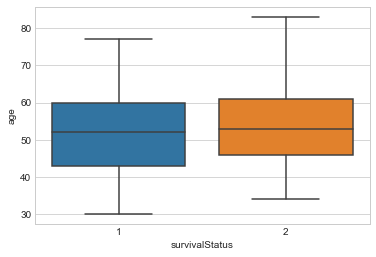

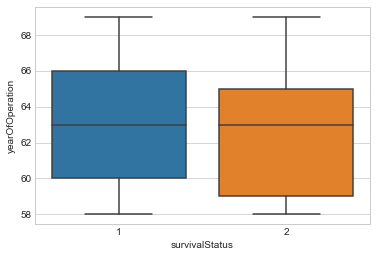

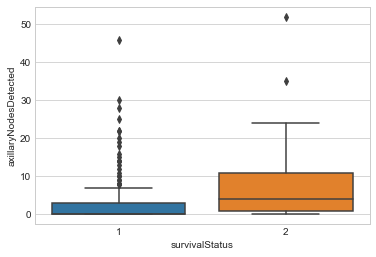

In [12]:
for i in range(3):
    sns.boxplot(x="survivalStatus", y=attributes[i], data=hb)
    plt.show()

axillaryNodesDetected provides the most separation of classes among all 3 paramaters.<br><br> Since we cannot see the exact percentile value using box plot diagram, we can find out the 75th percentile using describe() method.

In [13]:
hb_survived.describe()

,age,yearOfOperation,axillaryNodesDetected,survivalStatus
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [28]:
#Calculate % of lost patients who have axillaryNodesDetected equal to or below 3

temp = hb_lost.loc[hb_lost["axillaryNodesDetected"] <= 3]
print(temp.shape[0]/81)

0.48148148148148145


### Observations

1. axillaryNodesDetected can be used to classify the survivors. If axillaryNodesDetected <= 3, then survived else patient is lost. It may give an accuracy of 75% for recognising the patients who will sruvive since 75% of surviving patients had axillaryNodesDetected less than or equal to 3.

2. As for the lost patients, we have calculated that 48% of the lost patients had axillaryNodesDetected equal to or below 3 and they will be classified incorrectly using our if-else condition.

3. 75% of the surviving patients and 52% of the dying patients can be identified correctly if we use the above condition to identify.

4. Any other inference is not possible here.

5. Although Exploratory Data Analysis is helpful in most of the cases, it does not provide any significant help here, we will have to rely on algorithms to learn and classify patients.